c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0 0 1 1 2 2] [2 1 3 2 5 2]
['red', 'red', 'blue', 'blue', 'green', 'green']
{0: '0: N. America (2)', 1: '1: S. America (1)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (5)', 5: '5: Oceania (2)'}


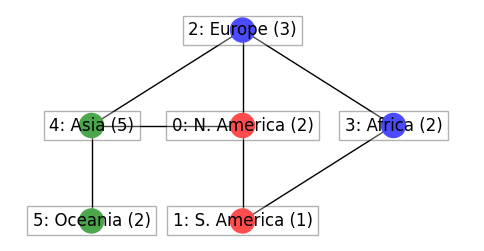

In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [2, 1, 0, 0, 0, 0],
    [0, 0, 3, 2, 0, 0],
    [0, 0, 0, 0, 5, 2]
])

layout = {0: np.array([0.5, 0.5]),
           1: np.array([0.5, 0.3]),
           2: np.array([0.5, 0.7]),
           3: np.array([0.7, 0.5]),
           4: np.array([0.3, 0.5]),
           5: np.array([0.3, 0.3])
           }

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]


labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(6,3))
plt.margins(x=0.2)
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

### Try a training

Training:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\game.py:398: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  if deploy_policy_loss.grad is not None:
c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\game.py:403: 

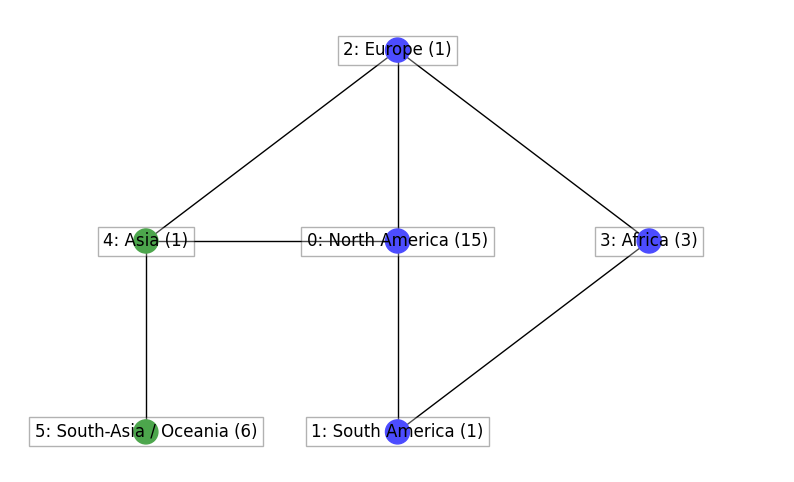

In [2]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
# torch.autograd.set_detect_anomaly(True)

# Call a new agent and set it to train mode
Agent = PolicyGradientAgent()
Agent.deploy_policy.train()
Agent.attack_policy.train()
Agent.fortify_policy.train()

game.agents = [Agent, RandomAgent(), RandomAgent()]

start_dict = game.agents[0].attack_policy.input_fc.state_dict()['weight']

game.reset_world()
game.train_REINFORCE(num_games=100, max_turns=100)

end_dict = game.agents[0].deploy_policy.input_fc.state_dict()['weight']

# Plot the final state of the game
game.visualize()